In [1]:
# Mounting google drive on colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Installing ultralytics to use YOLOV8 model
!pip install ultralytics -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 53.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 120.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 94.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 41.0 MB/s eta 0:00:00


In [3]:
# Importing libraries
import os
import cv2
import torch
import random
import numpy as np
from PIL import Image
from tqdm import tqdm
from glob import glob
from ultralytics import YOLO
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.metrics import jaccard_score, accuracy_score

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
# Edit data.yaml file to add dataset path and specify classes
data_yaml_path = '/content/drive/MyDrive/Binary masks YoloV8/data.yaml'

with open(data_yaml_path, 'w') as f:
    f.write('''\
path: /content/drive/MyDrive/Binary masks YoloV8
train: images/train
val: images/valid
test: images/test

names:
  0: teeth
''')

In [5]:
# Train the YOLOv8 Model
model = YOLO('yolov8l-seg.pt')

model.train(
    data=data_yaml_path,
    epochs=20,
    imgsz=256,
    batch=8,
    save=True,
    project='/content/drive/MyDrive/Dental_YOLOv8l',
    name='Dental_YOLOv8l'
)

100%|██████████| 88.1M/88.1M [00:02<00:00, 42.8MB/s]


Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Binary masks YoloV8/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=256, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8l-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=Dental_YOLOv8l, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.

100%|██████████| 755k/755k [00:00<00:00, 134MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  3    279808  ultralytics.nn.modules.block.C2f             [128, 128, 3, True]           
  3                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  4                  -1  6   2101248  ultralytics.nn.modules.block.C2f             [256, 256, 6, True]           
  5                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256, 512, 3, 2]              


  6                  -1  6   8396800  ultralytics.nn.modules.block.C2f             [512, 512, 6, True]           
  7                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  8                  -1  3   4461568  ultralytics.nn.modules.block.C2f             [512, 512, 3, True]           
  9                  -1  1    656896  ultralytics.nn.modules.block.SPPF            [512, 512, 5]                 
 10                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 11             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 12                  -1  3   4723712  ultralytics.nn.modules.block.C2f             [1024, 512, 3]                
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 14             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]  

100%|██████████| 5.35M/5.35M [00:00<00:00, 268MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.4±0.1 ms, read: 0.0±0.0 MB/s, size: 8.0 KB)


train: Scanning /content/drive/MyDrive/Binary masks YoloV8/labels/train.cache... 416 images, 0 backgrounds, 0 corrupt: 100%|██████████| 416/416 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.5±0.2 ms, read: 0.0±0.0 MB/s, size: 8.8 KB)


val: Scanning /content/drive/MyDrive/Binary masks YoloV8/labels/valid.cache... 52 images, 0 backgrounds, 0 corrupt: 100%|██████████| 52/52 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/Dental_YOLOv8l/Dental_YOLOv8l/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 106 weight(decay=0.0), 117 weight(decay=0.0005), 116 bias(decay=0.0)
Image sizes 256 train, 256 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/Dental_YOLOv8l/Dental_YOLOv8l
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/20      1.87G      1.156       2.07      1.202      1.138        184        256: 100%|██████████| 52/52 [00:19<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.14s/it]

                   all         52        675        0.3      0.733      0.275      0.169      0.281      0.687      0.243      0.132



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.21G     0.9761      1.571     0.6414       1.05        176        256: 100%|██████████| 52/52 [00:16<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.71it/s]

                   all         52        675      0.269      0.788      0.254      0.156      0.263      0.776      0.241      0.125



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.32G      1.035      1.611     0.6524      1.065        151        256: 100%|██████████| 52/52 [00:20<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.34it/s]

                   all         52        675      0.831      0.794      0.859      0.579      0.842      0.774      0.858       0.56



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.38G      1.006      1.526     0.6413      1.056        188        256: 100%|██████████| 52/52 [00:18<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.32it/s]

                   all         52        675      0.832      0.783      0.841      0.562      0.826      0.783      0.835      0.528



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.66G     0.9567      1.453     0.6015      1.034        201        256: 100%|██████████| 52/52 [00:21<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.17it/s]

                   all         52        675      0.869      0.846      0.903      0.627      0.877      0.841        0.9      0.606



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.67G     0.9133      1.373     0.5873      1.021        160        256: 100%|██████████| 52/52 [00:20<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.36it/s]

                   all         52        675      0.884      0.828      0.908       0.66      0.855      0.849      0.901      0.638



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.92G      0.894      1.335     0.5492      1.001        167        256: 100%|██████████| 52/52 [00:19<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.58it/s]

                   all         52        675      0.869      0.814      0.895      0.666      0.861      0.807      0.885      0.605



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/20      3.21G     0.8456       1.28     0.5221      0.995        137        256: 100%|██████████| 52/52 [00:18<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.35it/s]

                   all         52        675      0.922      0.839      0.925      0.696      0.914      0.834      0.921      0.649



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/20      3.21G     0.8447      1.271     0.5061     0.9871        161        256: 100%|██████████| 52/52 [00:22<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.03it/s]

                   all         52        675      0.894      0.864      0.927      0.708      0.902      0.836      0.921      0.668



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/20      3.21G     0.8384      1.222     0.5017      0.985        222        256: 100%|██████████| 52/52 [00:20<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.06it/s]

                   all         52        675      0.892      0.874       0.93      0.702      0.881      0.863      0.918      0.622


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/20      3.21G     0.8018      1.209     0.5061      1.015         70        256: 100%|██████████| 52/52 [00:16<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.95it/s]

                   all         52        675      0.882      0.884       0.92      0.703      0.886      0.873      0.904      0.624



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/20      3.21G     0.7899      1.179     0.4929      1.008         96        256: 100%|██████████| 52/52 [00:21<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.46it/s]

                   all         52        675      0.892      0.867      0.932      0.725      0.886      0.858      0.922      0.633



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/20      3.21G     0.7541      1.124     0.4707     0.9942         79        256: 100%|██████████| 52/52 [00:16<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.46it/s]

                   all         52        675      0.909      0.844      0.935      0.727      0.904      0.841      0.928      0.661



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/20      3.21G     0.7465      1.102     0.4547     0.9818         77        256: 100%|██████████| 52/52 [00:09<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.39it/s]

                   all         52        675      0.906      0.867      0.936      0.725      0.911      0.856      0.932      0.676



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/20      3.21G     0.7364      1.072     0.4389     0.9689        111        256: 100%|██████████| 52/52 [00:16<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.05it/s]

                   all         52        675      0.909      0.868      0.934      0.742      0.903      0.864      0.927       0.67



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/20      3.46G     0.7015      1.041     0.4312     0.9698         88        256: 100%|██████████| 52/52 [00:15<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.28it/s]

                   all         52        675      0.917      0.882      0.938      0.743      0.914      0.886      0.936      0.675



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/20      3.46G     0.6931      1.034     0.4233     0.9574        103        256: 100%|██████████| 52/52 [00:15<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.51it/s]

                   all         52        675      0.919      0.885      0.944      0.751      0.912       0.88       0.94      0.685



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/20      3.46G     0.6764       1.01     0.4124     0.9488        110        256: 100%|██████████| 52/52 [00:10<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.19it/s]

                   all         52        675      0.897      0.901      0.943      0.759       0.89      0.893      0.934      0.675



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/20      3.46G     0.6594     0.9822     0.3987     0.9437        104        256: 100%|██████████| 52/52 [00:17<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.76it/s]

                   all         52        675      0.906      0.902      0.946      0.767      0.907      0.885      0.937      0.682



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/20      3.46G     0.6438      0.961     0.3884     0.9402        115        256: 100%|██████████| 52/52 [00:18<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.74it/s]

                   all         52        675       0.91      0.895      0.947      0.766      0.912      0.875      0.933      0.686



20 epochs completed in 0.132 hours.
Optimizer stripped from /content/drive/MyDrive/Dental_YOLOv8l/Dental_YOLOv8l/weights/last.pt, 92.2MB
Optimizer stripped from /content/drive/MyDrive/Dental_YOLOv8l/Dental_YOLOv8l/weights/best.pt, 92.2MB

Validating /content/drive/MyDrive/Dental_YOLOv8l/Dental_YOLOv8l/weights/best.pt...
Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8l-seg summary (fused): 125 layers, 45,912,659 parameters, 0 gradients, 220.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/4 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  25%|██▌       | 1/4 [00:00<00:00,  3.96it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  50%|█████     | 2/4 [00:00<00:01,  1.88it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.66it/s]


                   all         52        675      0.908      0.894      0.947      0.767      0.912      0.875      0.933      0.686
Speed: 0.1ms preprocess, 8.7ms inference, 0.0ms loss, 8.5ms postprocess per image
Results saved to /content/drive/MyDrive/Dental_YOLOv8l/Dental_YOLOv8l


ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c404bb35310>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041, 

In [6]:
metrics = model.val(split='test', verbose=False)
seg = metrics.seg
print("Segmentation Metrics (Test Set):")
print(f"Precision:     {seg.mp:.4f}")
print(f"Recall:        {seg.mr:.4f}")
print(f"mAP@0.5:       {seg.map50:.4f}")
print(f"mAP@0.5:0.95:  {seg.map:.4f}")


Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8l-seg summary (fused): 125 layers, 45,912,659 parameters, 0 gradients, 220.1 GFLOPs
val: Fast image access ✅ (ping: 0.5±0.2 ms, read: 0.0±0.0 MB/s, size: 8.8 KB)


val: Scanning /content/drive/MyDrive/Binary masks YoloV8/labels/test.cache... 52 images, 0 backgrounds, 0 corrupt: 100%|██████████| 52/52 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/7 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  14%|█▍        | 1/7 [00:11<01:07, 11.28s/it]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  29%|██▊       | 2/7 [00:11<00:24,  4.86s/it]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:29<00:00,  4.23s/it]


                   all         52        627      0.916       0.89      0.947      0.793       0.91      0.884       0.94      0.701
Speed: 0.3ms preprocess, 16.6ms inference, 0.0ms loss, 3.8ms postprocess per image
Results saved to /content/drive/MyDrive/Dental_YOLOv8l/Dental_YOLOv8l2
Segmentation Metrics (Test Set):
Precision:     0.9096
Recall:        0.8836
mAP@0.5:       0.9396
mAP@0.5:0.95:  0.7013


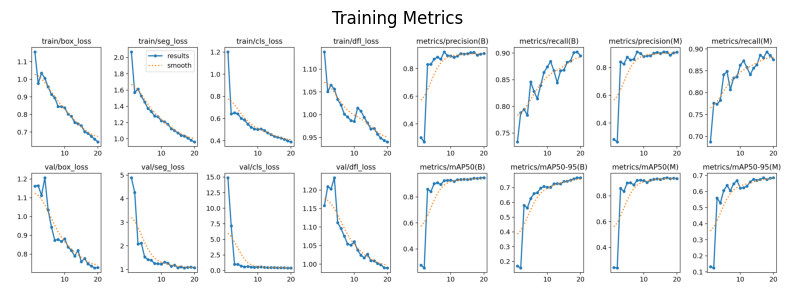

In [7]:
# Display Training Metrics
image_path = '/content/drive/MyDrive/Dental_YOLOv8l/Dental_YOLOv8l/results.png'
img = mpimg.imread(image_path)
plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.axis('off')
plt.title("Training Metrics")
plt.show()

In [8]:
# Function to rasterize YOLO segmentation labels into binary mask
def load_yolo_segmentation_mask(label_path, img_shape):
    h, w = img_shape
    mask = np.zeros((h, w), dtype=np.uint8)
    if not os.path.exists(label_path):
        return mask

    with open(label_path, 'r') as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) < 6:
                continue
            coords = list(map(float, parts[1:]))
            points = np.array(coords).reshape(-1, 2)
            points *= np.array([w, h])
            points = points.astype(np.int32)
            cv2.fillPoly(mask, [points], 1)

    return mask

In [9]:
# Directories
img_dir = '/content/drive/MyDrive/Binary masks YoloV8/images/test'
label_dir = '/content/drive/MyDrive/Binary masks YoloV8/labels/test'

# Load all test image paths
image_files = sorted(glob(os.path.join(img_dir, '*.jpg')))

# Select up to 5 random images
num_images = min(5, len(image_files))
image_files = random.sample(image_files, num_images)


0: 256x256 16 teeths, 19.1ms
1: 256x256 18 teeths, 19.1ms
2: 256x256 12 teeths, 19.1ms
3: 256x256 10 teeths, 19.1ms
4: 256x256 9 teeths, 19.1ms


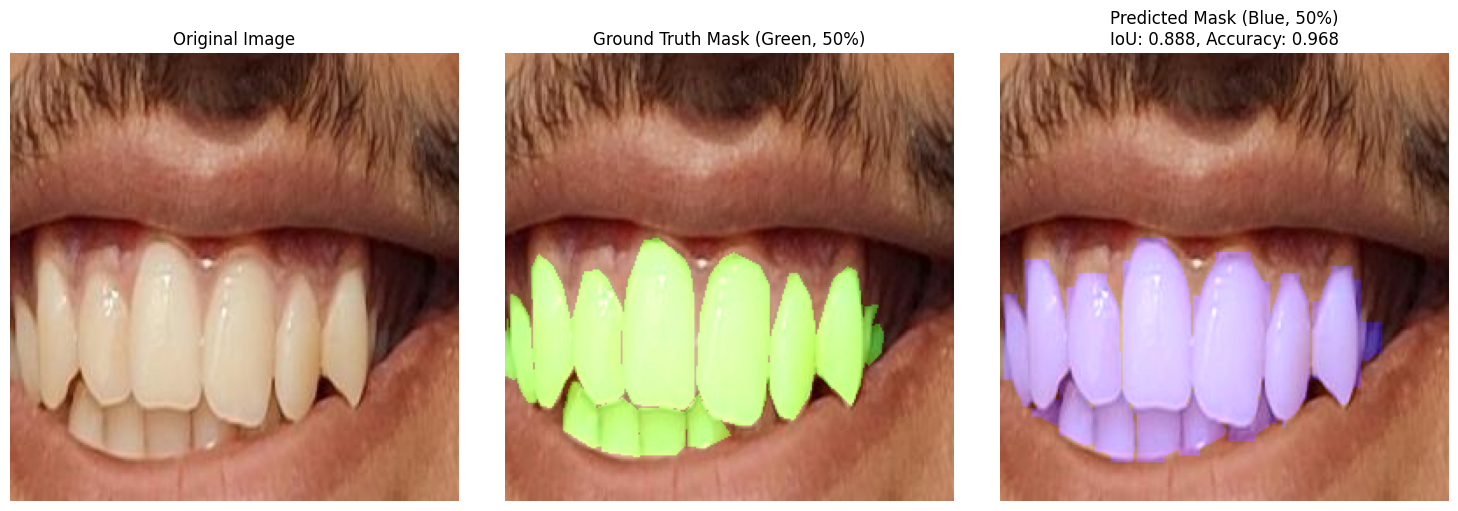

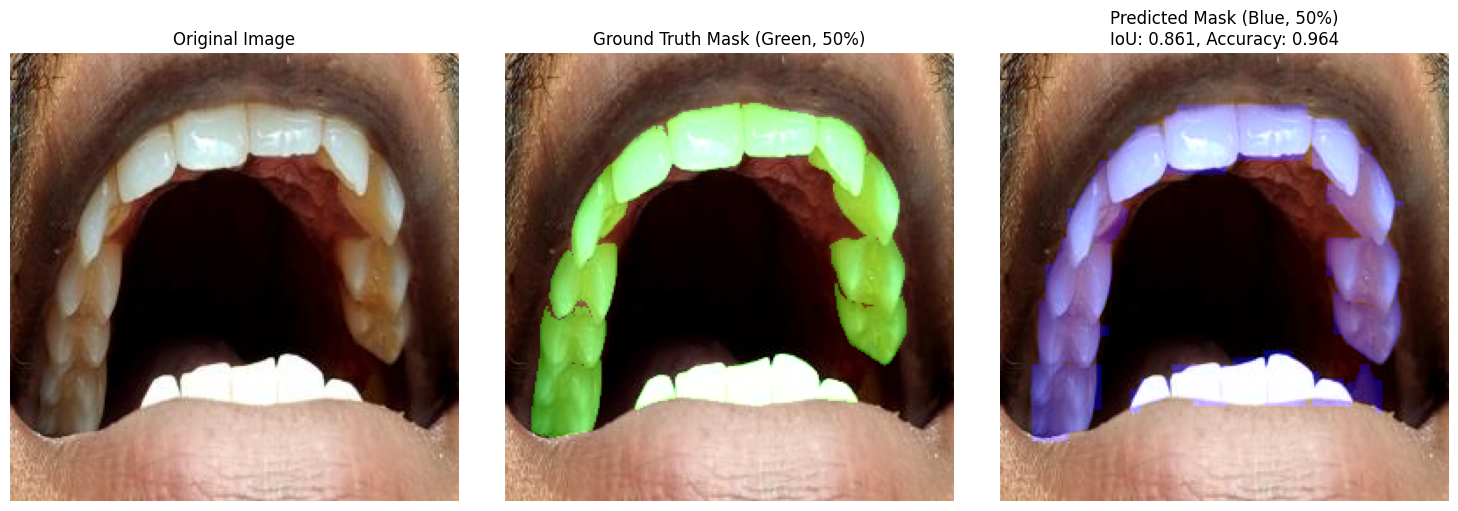

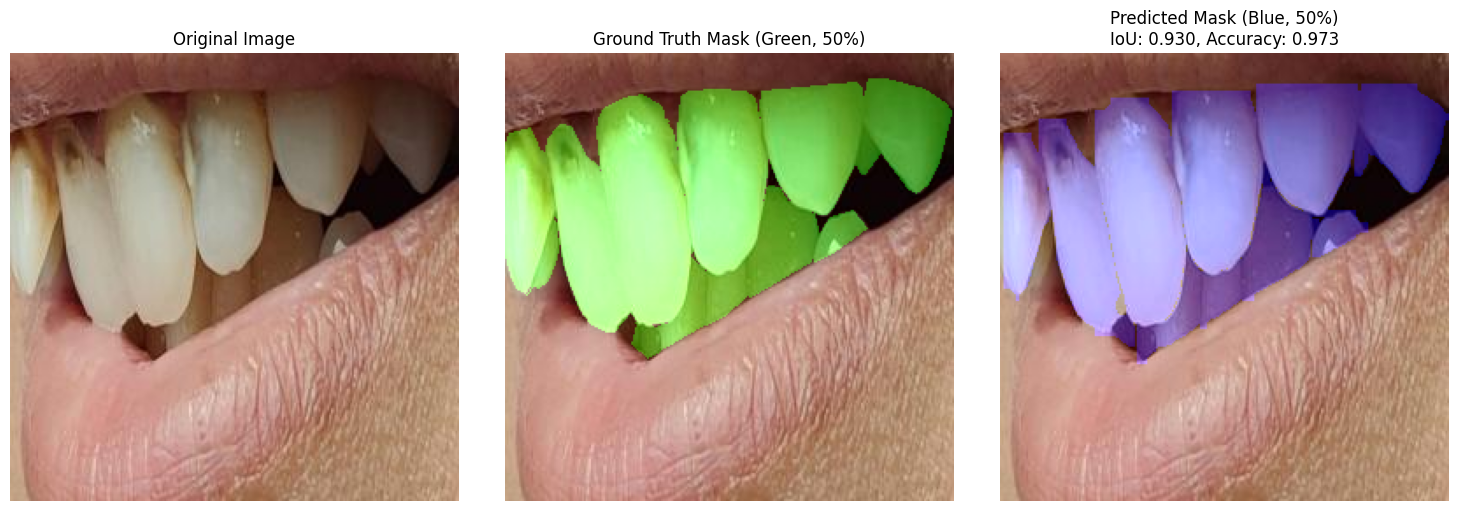

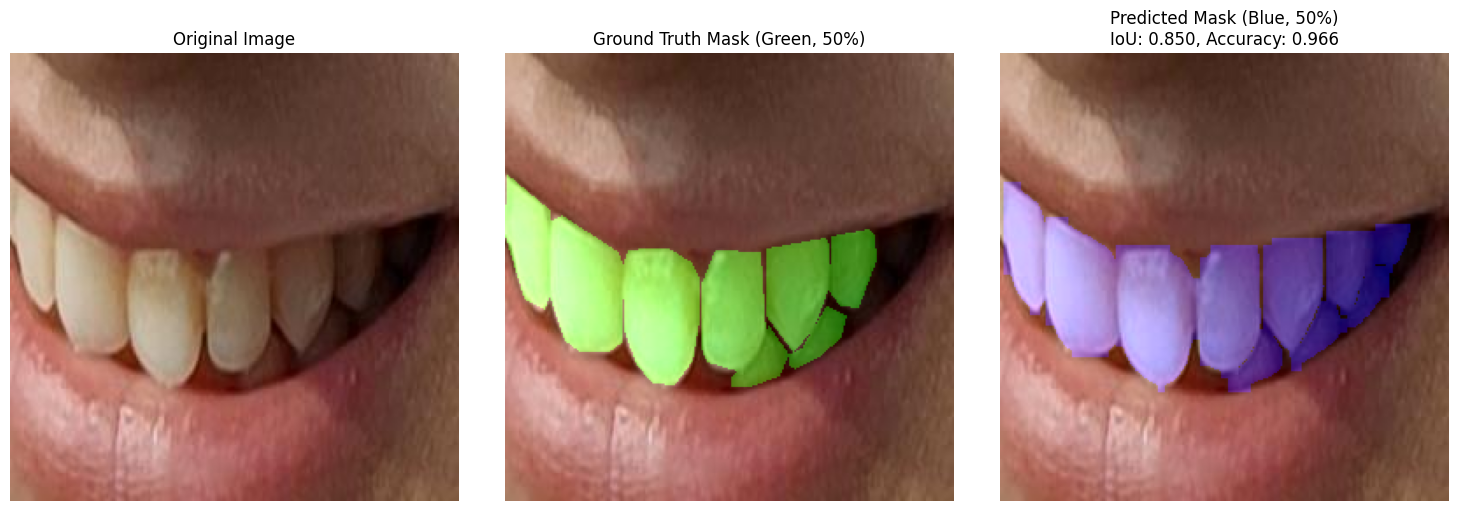

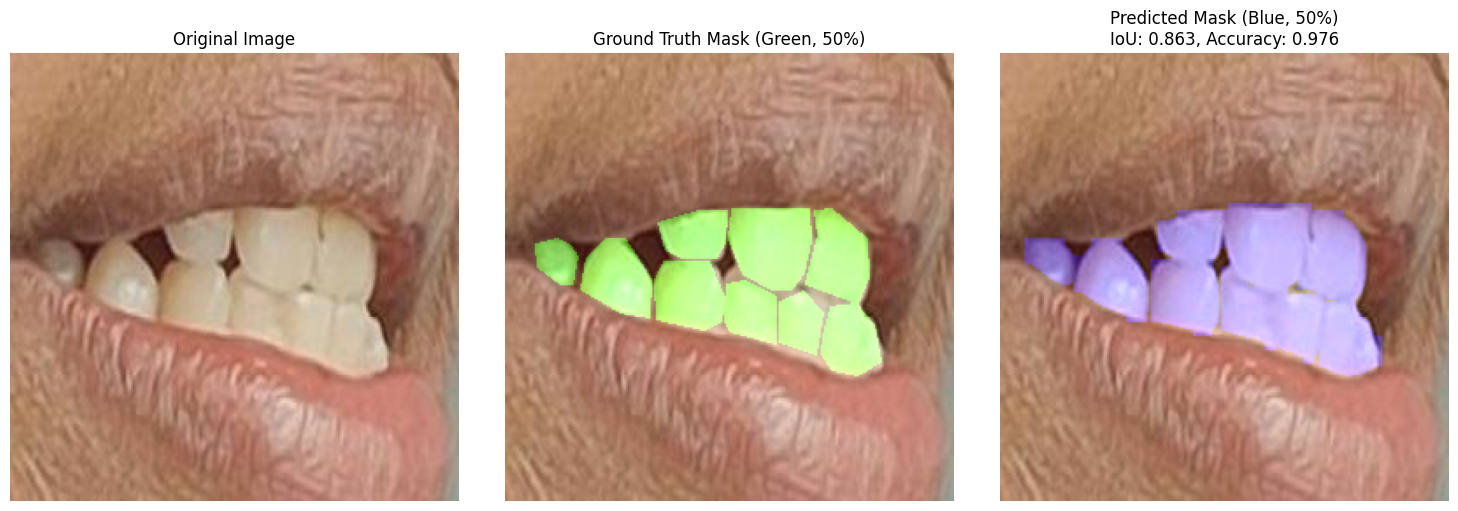

Speed: 0.5ms preprocess, 19.1ms inference, 4.0ms postprocess per image at shape (1, 3, 256, 256)


In [10]:
# Predict
results = model.predict(image_files, imgsz=256, save=False, stream=True)

# Loop through results and display
for i, result in enumerate(results):
    image_path = image_files[i]
    label_path = os.path.join(label_dir, os.path.basename(image_path).replace('.jpg', '.txt'))

    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w = img.shape[:2]

    # Ground truth mask
    gt_mask_bin = load_yolo_segmentation_mask(label_path, (h, w))

    # Predicted mask
    pred_mask_bin = np.zeros((h, w), dtype=np.uint8)
    if result.masks is not None:
        for m in result.masks.data:
            m = m.cpu().numpy()
            m = cv2.resize(m, (w, h), interpolation=cv2.INTER_NEAREST)
            pred_mask_bin = np.logical_or(pred_mask_bin, m > 0.5).astype(np.uint8)

    # Evaluation
    iou = jaccard_score(gt_mask_bin.flatten(), pred_mask_bin.flatten())
    acc = accuracy_score(gt_mask_bin.flatten(), pred_mask_bin.flatten())

    # Create color mask overlays
    green_mask = np.zeros_like(img)
    green_mask[gt_mask_bin == 1] = [0, 255, 0]  # Ground truth in green

    blue_mask = np.zeros_like(img)
    blue_mask[pred_mask_bin == 1] = [0, 0, 255]  # Prediction in blue (BGR to RGB = Blue)

    # Blend masks with original image
    overlay_gt = cv2.addWeighted(img, 1.0, green_mask, 0.4, 0)
    overlay_pred = cv2.addWeighted(img, 1.0, blue_mask, 0.4, 0)

    # Plotting
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].imshow(img)
    axs[0].set_title("Original Image")

    axs[1].imshow(overlay_gt)
    axs[1].set_title("Ground Truth Mask (Green, 50%)")

    axs[2].imshow(overlay_pred)
    axs[2].set_title(f"Predicted Mask (Blue, 50%)\nIoU: {iou:.3f}, Accuracy: {acc:.3f}")

    for ax in axs:
        ax.axis('off')

    plt.tight_layout()
    plt.show()

In [11]:
ious = []
accuracies = []
# Predict
results = model.predict(image_files, imgsz=256, save=False, stream=True)

# Loop through results and evaluate
for i, result in enumerate(results):
    image_path = image_files[i]
    label_path = os.path.join(label_dir, os.path.basename(image_path).replace('.jpg', '.txt'))

    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w = img.shape[:2]

    # Ground truth mask
    gt_mask_bin = load_yolo_segmentation_mask(label_path, (h, w))

    # Predicted mask
    pred_mask_bin = np.zeros((h, w), dtype=np.uint8)
    if result.masks is not None:
        for m in result.masks.data:
            m = m.cpu().numpy()
            m = cv2.resize(m, (w, h), interpolation=cv2.INTER_NEAREST)
            pred_mask_bin = np.logical_or(pred_mask_bin, m > 0.5).astype(np.uint8)

    # Evaluation
    iou = jaccard_score(gt_mask_bin.flatten(), pred_mask_bin.flatten())
    acc = accuracy_score(gt_mask_bin.flatten(), pred_mask_bin.flatten())

    ious.append(iou)
    accuracies.append(acc)


0: 256x256 16 teeths, 12.0ms
1: 256x256 18 teeths, 12.0ms
2: 256x256 12 teeths, 12.0ms
3: 256x256 10 teeths, 12.0ms
4: 256x256 9 teeths, 12.0ms
Speed: 0.5ms preprocess, 12.0ms inference, 1.7ms postprocess per image at shape (1, 3, 256, 256)


In [12]:
# D
mean_iou = np.mean(ious)
mean_acc = np.mean(accuracies)

print(f"\nEvaluation Complete\n")
print(f"Mean IoU     : {mean_iou:.4f}")
print(f"Mean Accuracy: {mean_acc:.4f}")


Evaluation Complete

Mean IoU     : 0.8784
Mean Accuracy: 0.9694


In [13]:
# Saving model
model_path = '/content/drive/MyDrive/Dental_YOLOv8l.pt'
model.save(model_path)